# Final Passages Data Visualization

This project visualizes data from the Final Passages project, detailing slave voyages within the Americas from the years 1652-1812. 

Made with the help of tutorials from: https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d 

and https://towardsdatascience.com/data-visualization-simple-statistical-views-in-pandas-cf31d5fd4e39

In [5]:
# import statements 

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [8]:
# Load in CSV

df = pd.read_csv("data\Jamaica\Jamaica-VisualizationData.csv", header=0)

df = df[['voyageid','yearam','slaximp', 'mjselimp']]

data_for_map = df.rename(index=str, columns={"voyageid": "Voyage ID","yearam": "Voyage Year","slaximp": "Captives on Vessel","mjselimp" : "Arrival colony"})



## Number of captives in voyages by year

Text(0.5, 0, 'Year')

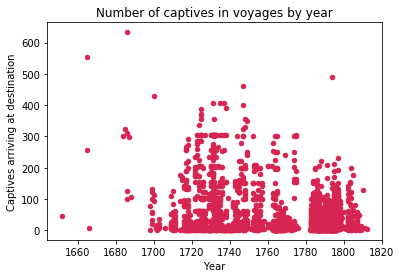

In [9]:
df.plot.scatter(y='slaximp', x='yearam', color='#D72552')
plt.title('Number of captives in voyages by year')
plt.ylabel('Captives arriving at destination')
plt.xlabel('Year')

Text(0.5, 0, 'Number of voyages')

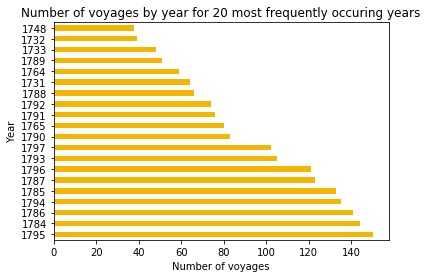

In [10]:
df['yearam'].value_counts()[:20].plot(kind='barh', color='#F3B703')
plt.title('Number of voyages by year for 20 most frequently occuring years')
plt.ylabel('Year')
plt.xlabel('Number of voyages')

Text(0.5, 0, 'Number of voyages')

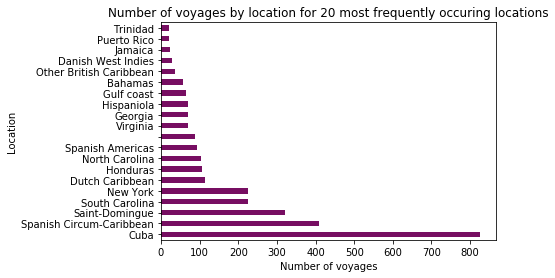

In [11]:
df['mjselimp'].value_counts()[:20].plot(kind='barh', color='#770E62')
plt.title('Number of voyages by location for 20 most frequently occuring locations')
plt.ylabel('Location')
plt.xlabel('Number of voyages')

## Map of voyage destinations

C:\Users\dacha\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


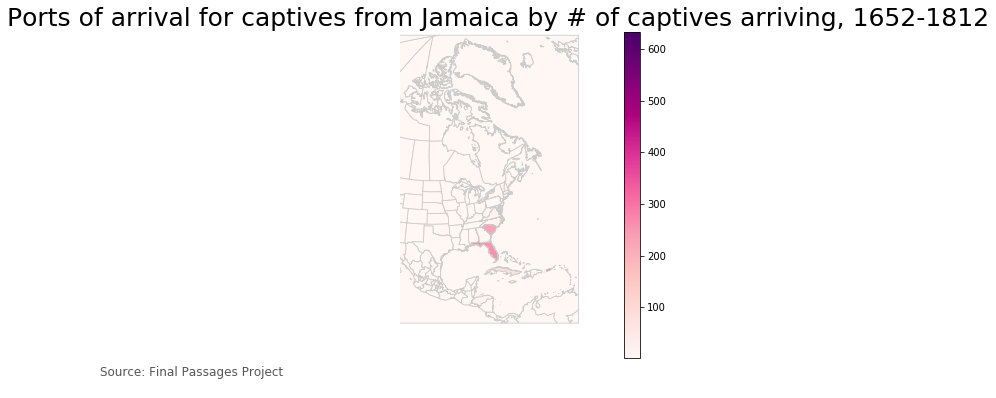

In [12]:
# Displaying a map of voyages

# set the filepath and load in a shapefile

fp = "mapdata/boundary_p_v2.shp"

map_df = gpd.read_file(fp)

# check data type so we can see that this is not a normal dataframe, but a GEOdataframe

map_df.head()

# Now let’s preview what our map looks like with no data in it.

# map_df.plot()

df = pd.read_csv("data\Jamaica\jamaica.csv", header=0)


df = df[['voyageid','yearam','slaximp', 'mjselimp']]

data_for_map = df.rename(index=str, columns={"voyageid": "Voyage ID","yearam": "Voyage Year","slaximp": "Captives on Vessel","mjselimp" : "Arrival colony"})



df.head()

# check dat dataframe

data_for_map.head()

# join the geodataframe with the cleaned up csv dataframe

merged = map_df.set_index('NAME').join(data_for_map.set_index('Arrival colony'))

# merged.head()

# set a variable that will call whatever column we want to visualise on the map

variable = 'Captives on Vessel'

# set the range for the choropleth

vmin, vmax = 1, 633

# create figure and axes for Matplotlib



fig, ax = plt.subplots(1, figsize=(10, 6))

ax.set_xlim(-1000000, 5000000)
ax.set_ylim(-5000000, 5000000)

# create map

merged.plot(column=variable, cmap='RdPu', linewidth=0.8, ax=ax, edgecolor='0.8')

# remove the axis

ax.axis('off')

# add a title

ax.set_title('Ports of arrival for captives from Jamaica by # of captives arriving, 1652-1812', fontdict={'fontsize': '25', 'fontweight' : '3'})

# create an annotation for the data source

ax.annotate('Source: Final Passages Project',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

# Create colorbar as a legend

sm = plt.cm.ScalarMappable(cmap='RdPu', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range

sm._A = []

# add the colorbar to the figure

cbar = fig.colorbar(sm)